In [6]:
# Import libraries
import pandas as pd
from pathlib import Path
import numpy as np
import seaborn as sns
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [8]:
# Load CSVs
books_path = Path('books_cleaned.txt')
ratings_path = Path('ratings_cleaned.csv')
users_path = Path('users_cleaned.csv')
books_df = pd.read_csv(books_path, index_col=0)
ratings_df = pd.read_csv(ratings_path, index_col=0)
users_df = pd.read_csv(users_path, index_col=0)

In [9]:
# Check head
ratings_df.head()

,User-ID,ISBN,Book-Rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
6,276736,3257224281,8
7,276737,0600570967,6


In [10]:
# Drop Image-URL columns since they do not add value for recommendation system
books_df.drop(books_df.iloc[:, 5:8], inplace=True, axis=1)
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [11]:
# Check head
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",34
1,2,"stockton, california, usa",18
2,3,"moscow, yukon territory, russia",34
3,4,"porto, v.n.gaia, portugal",17
4,5,"farnborough, hants, united kingdom",34


In [12]:
# Merge users_df with ratings_dff
user_ratings_df = pd.merge(users_df, ratings_df, on='User-ID')

In [13]:
# Check head
user_ratings_df.head()

,User-ID,Location,Age,ISBN,Book-Rating
0,8,"timmins, ontario, canada",34,0002005018,5
1,8,"timmins, ontario, canada",34,074322678X,5
2,8,"timmins, ontario, canada",34,0887841740,5
3,8,"timmins, ontario, canada",34,1552041778,5
4,8,"timmins, ontario, canada",34,1567407781,6


In [14]:
# Merge user_ratings_df with books_df
books_user_ratings_df = pd.merge(user_ratings_df, books_df, on='ISBN')

In [15]:
# Check head
books_user_ratings_df.head()

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,8,"timmins, ontario, canada",34,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
1,67544,"toronto, ontario, canada",30,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,116866,"ottawa, ,",34,0002005018,9,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
3,123629,"kingston, ontario, canada",34,0002005018,9,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
4,200273,"comber, ontario, canada",34,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada


In [16]:
# Check shape
books_user_ratings_df.shape

(376894, 9)

In [17]:
# Check head
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",34
1,2,"stockton, california, usa",18
2,3,"moscow, yukon territory, russia",34
3,4,"porto, v.n.gaia, portugal",17
4,5,"farnborough, hants, united kingdom",34


# Exploratory Data Analysis

In [18]:
# Store total # of books, ratings and users in variables
n_books = len(books_df.index.unique())
n_ratings = len(ratings_df)
n_users = len(users_df.index.unique())

In [19]:
# Print count and average ratings per DataFrame
print(f"Number of ratings: {n_ratings}")
print(f"Number of unique books: {n_books}")
print(f"Number of unique users: {n_users}")
print(f"Average ratings per user: {round(n_ratings/n_users, 2)}")
print(f"Average ratings per book: {round(n_ratings/n_books, 2)}")

Number of ratings: 433671
Number of unique books: 271360
Number of unique users: 278847
Average ratings per user: 1.56
Average ratings per book: 1.6


In [20]:
# Sort book titles with highest ratings
sorted_book_ratings = books_user_ratings_df.groupby('Book-Title')['Book-Rating'].mean().sort_values(ascending=False)
sorted_book_ratings

Book-Title
Minima Moralia: Reflections from Damaged Life                        10.0
Paralympics: Where Heroes Come                                       10.0
Celtic Knotwork Handbook                                             10.0
Celtic Knotwork                                                      10.0
Celtic Iron-On Transfer Patterns (Iron-On Transfers)                 10.0
                                                                     ... 
Die Stimmen von Salem.                                                1.0
Raising Positive Kids in a Negative World                             1.0
Potemkin Cola (Ossigeno)                                              1.0
City in Which I Love You: Poems (American Poets Continuum, No 20)     1.0
Pocket Aristotle (Enriched Classics)                                  1.0
Name: Book-Rating, Length: 134374, dtype: float64

In [21]:
# Count # of ratings per book and sort values
ratings_data = pd.DataFrame(books_user_ratings_df.groupby('Book-Title')['Book-Rating'].mean())

In [22]:
# Count # of ratings per book and sort values
ratings_data['Ratings-Count'] = pd.DataFrame(books_user_ratings_df.groupby('Book-Title')['Book-Rating'].count())

In [23]:
# Rename column for Average-Rating
ratings_data.rename(columns = {'Book-Rating': 'Average-Rating'}, inplace=True)

In [24]:
# Check head
ratings_data.head()

,Average-Rating,Ratings-Count
Book-Title,,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",9.000000,1
"Ask Lily (Young Women of Faith: Lily Series, Book 5)",8.000000,1
Dark Justice,10.000000,1
"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",7.142857,7
Final Fantasy Anthology: Official Strategy Guide (Brady Games),10.000000,2


In [25]:
# Check shape
ratings_data.shape

(134374, 2)

C:\Users\zaina\AppData\Local\Temp\ipykernel_26204\520117388.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ratings_data['Ratings-Count'])


<Axes: xlabel='Ratings-Count', ylabel='Density'>

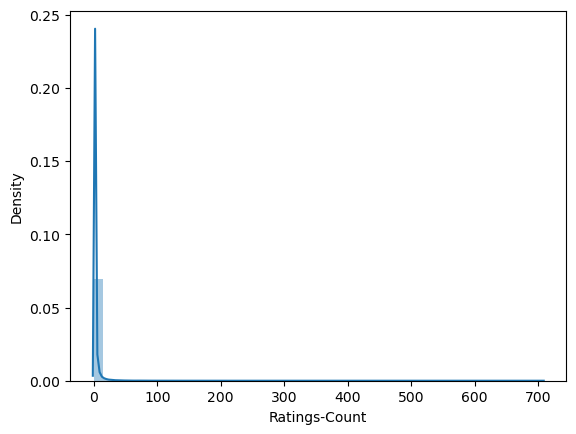

In [26]:
# Plot histogram for Ratings-Count - Source - https://nickmccullum.com/python-machine-learning/recommendation-systems-python/#exploratory-data-analysis
sns.distplot(ratings_data['Ratings-Count'])

### The histogram below provides greater insight into the distribution of ratings count per rating score. There is extreme density at the 0 rating and peaks shown at 4 through 10 meaning that there are an extremely high number of books that are scored 0.

C:\Users\zaina\AppData\Local\Temp\ipykernel_26204\2775661784.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ratings_data['Average-Rating'])


<Axes: xlabel='Average-Rating', ylabel='Density'>

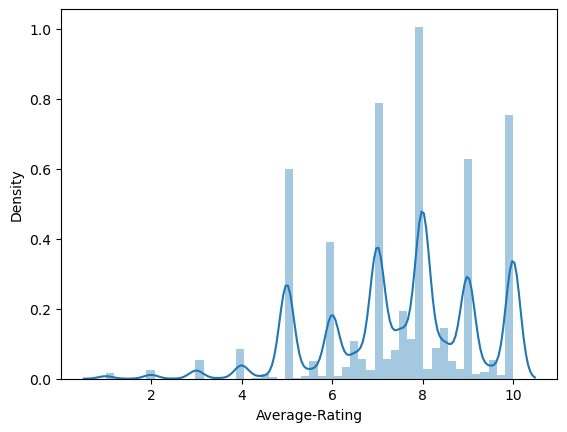

In [27]:
# Plot histogram for Average-Rating - Source - https://nickmccullum.com/python-machine-learning/recommendation-systems-python/#exploratory-data-analysis
sns.distplot(ratings_data['Average-Rating'])

# The joint plot below shows that most ratings are given for books in the 6 and 9 range.

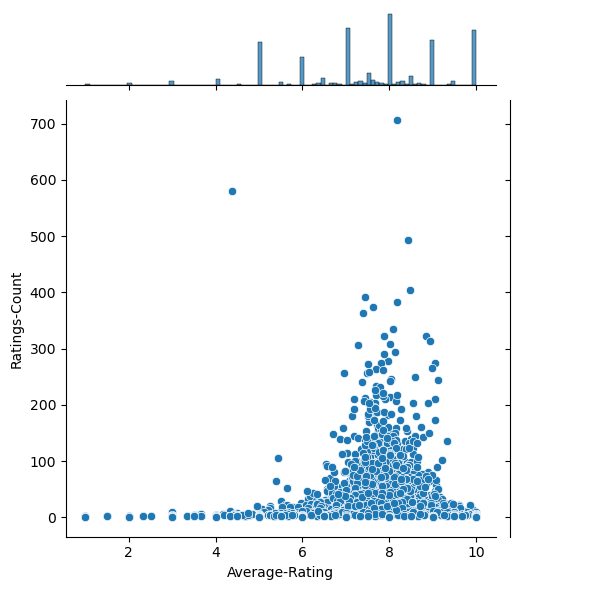

In [28]:
# Plot join plot
sns.jointplot(x = ratings_data['Average-Rating'], y = ratings_data['Ratings-Count'])

In [29]:
# Aggregate total Ratings-Count per User-ID. Sort for top 10 - Source - https://www.geeksforgeeks.org/recommendation-system-in-python/?ref=rp
user_freq = books_user_ratings_df[['User-ID', 'Book-Title']].groupby('User-ID').count().reset_index()
user_freq.columns = ['User-ID', 'Ratings-Count']
user_freq.sort_values(by='Ratings-Count', ascending=False).head(10)

,User-ID,Ratings-Count
24099,98391,5691
46277,189835,1899
37646,153662,1845
5614,23902,1180
57318,235105,1020
18755,76499,1012
41779,171118,962
3901,16795,959
60770,248718,941
13879,56399,837


In [30]:
# Find Lowest and Highest rated books:
mean_rating = books_user_ratings_df[['Book-Rating', 'Book-Title']].groupby('Book-Title')[['Book-Rating']].mean()
mean_rating.sort_values(by='Book-Rating', ascending=False).head()

,Book-Rating
Book-Title,
Minima Moralia: Reflections from Damaged Life,10.0
Paralympics: Where Heroes Come,10.0
Celtic Knotwork Handbook,10.0
Celtic Knotwork,10.0
Celtic Iron-On Transfer Patterns (Iron-On Transfers),10.0


In [31]:
# Lowest rated books
lowest_rated = mean_rating['Book-Rating'].idxmin()
books_user_ratings_df.loc[books_user_ratings_df['Book-Title'] == lowest_rated]

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
256260,76499,"new york, new york, usa",34,0393093115,1,1848: The Revolutionary Tide in Europe (Revolu...,Peter N. Stearns,1974,W. W. Norton &amp; Company


In [32]:
# Highest rated books
highest_rated = mean_rating['Book-Rating'].idxmax()
books_user_ratings_df.loc[books_user_ratings_df['Book-Title'] == highest_rated]

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
281482,98391,"morrow, georgia, usa",52,0399151788,10,Dark Justice,Jack Higgins,2004,Putnam Publishing Group


In [33]:
# Top 10 ratings count - Source - https://www.geeksforgeeks.org/recommendation-system-in-python/?ref=rp
books_stats = books_user_ratings_df.groupby('Book-Title')[['Book-Rating']].agg(['count', 'mean'])
books_stats.columns = books_stats.columns.droplevel()
books_stats.sort_values(by='count', ascending=False).head(10)

,count,mean
Book-Title,,
The Lovely Bones: A Novel,706,8.189802
Wild Animus,580,4.387931
The Da Vinci Code,493,8.438134
The Secret Life of Bees,404,8.475248
The Nanny Diaries: A Novel,391,7.437340
The Red Tent (Bestselling Backlist),382,8.178010
Bridget Jones's Diary,374,7.636364
A Painted House,364,7.390110
Life of Pi,334,8.092814


In [34]:
# Create array of unique ISBN values, convert to series, then to DataFrame - Source - https://www.geeksforgeeks.org/recommendation-system-in-python/?ref=rp
book_ids = pd.unique(books_user_ratings_df['ISBN'].ravel())
book_ids = pd.Series(np.arange(len(book_ids)), book_ids)
book_ids = pd.DataFrame(book_ids)
book_ids.reset_index(inplace=True)
book_ids.rename(columns = {'index':'ISBN', 0:'Book-ID'}, inplace=True)
book_ids.head()

,ISBN,Book-ID
0,0002005018,0
1,074322678X,1
2,0887841740,2
3,1552041778,3
4,1567407781,4


In [35]:
# Merge books-user_ratings with book_ids
books_user_ratings_df = pd.merge(books_user_ratings_df, book_ids, on='ISBN')

In [36]:
# Check head
books_user_ratings_df.head()

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Book-ID
0,8,"timmins, ontario, canada",34,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,0
1,67544,"toronto, ontario, canada",30,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,0
2,116866,"ottawa, ,",34,0002005018,9,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,0
3,123629,"kingston, ontario, canada",34,0002005018,9,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,0
4,200273,"comber, ontario, canada",34,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,0


In [37]:
# Check shape
books_user_ratings_df.shape

(376894, 10)

# Compressed Sparse Row Matrix (CSR Matrix)

Sparse matrices have most elements as zeroes as opposed to dense matrices which have most elements as non-zeros. The benefits of a CSR matrix is that memory required for data storage is minimized and stored in the RAM. Performing operations using only non-zero values increases the speed of the algorithm.

Here we will use the CSR matrix to feed into our machine learning algorithm.


In [38]:
from scipy.sparse import csr_matrix

# Define create_matrix function - Source - https://www.geeksforgeeks.org/recommendation-system-in-python/?ref=rp
def create_matrix(df):
      
    N = len(df['User-ID'].unique())
    M = len(df['Book-ID'].unique())
      
    # Map IDs to indices
    user_mapper = dict(zip(np.unique(df["User-ID"]), list(range(N))))
    book_mapper = dict(zip(np.unique(df["Book-ID"]), list(range(M))))
      
    # Map indices to IDs
    user_inv_mapper = dict(zip(list(range(N)), np.unique(df["User-ID"])))
    book_inv_mapper = dict(zip(list(range(M)), np.unique(df["Book-ID"])))
      
    user_index = [user_mapper[i] for i in df['User-ID']]
    book_index = [book_mapper[i] for i in df['Book-ID']]
  
    X = csr_matrix((df["Book-ID"], (book_index, user_index)), shape=(M, N))
      
    return X, user_mapper, book_mapper, user_inv_mapper, book_inv_mapper

In [39]:
# Feed values to create_matrix function
X, user_mapper, book_mapper, user_inv_mapper, book_inv_mapper = create_matrix(books_user_ratings_df)

# K-Nearest Neighbors

Sci-kit Learn's NearestNeighbors algorithm is an unsupervised learner for implementing neighbor searches. Here we will execute a brute search with a cosine similarity matrix where the algorithm normalizes the rating by subtracting the mean.

In [40]:
from sklearn.neighbors import NearestNeighbors
"""
Find similar books using KNN
"""
# Define find_similar_books function - Source - https://www.geeksforgeeks.org/recommendation-system-in-python/?ref=rp
def find_similar_books(book_id, X, k, metric='cosine', show_distance=False):
      
    neighbour_ids = []
      
    book_ind = book_mapper[book_id]
    book_vec = X[book_ind]
    k+=1
    kNN = NearestNeighbors(n_neighbors=k, algorithm="brute", metric=metric)
    kNN.fit(X)
    book_vec = book_vec.reshape(1,-1)
    neighbour = kNN.kneighbors(book_vec, return_distance=show_distance)
    for i in range(0,k):
        n = neighbour.item(i)
        neighbour_ids.append(book_inv_mapper[n])
    neighbour_ids.pop(0)
    return neighbour_ids

In [41]:
# Assign books to dictionary
book_titles = dict(zip(books_user_ratings_df['Book-ID'], books_user_ratings_df['Book-Title']))

In [42]:
# Get Book ID of Brave New World - See all books titled 'Brave New World' - 
# Notice duplicate titles due to different publisher and/or year of publication.
# Future opportunity to further refine dataset to eliminate these duplications.
books_user_ratings_df.loc[books_user_ratings_df['Book-Title'] == 'Brave New World']

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Book-ID
59523,4017,"new orleans, louisiana, usa",48,0060929871,9,Brave New World,Aldous Huxley,1998,Perennial,3931
59524,4483,"aldergrove, british columbia, canada",34,0060929871,6,Brave New World,Aldous Huxley,1998,Perennial,3931
59525,8253,"tulsa, oklahoma, usa",26,0060929871,10,Brave New World,Aldous Huxley,1998,Perennial,3931
59526,8570,"rochester, new york, usa",23,0060929871,8,Brave New World,Aldous Huxley,1998,Perennial,3931
59527,12423,"bloomington, illinois, usa",52,0060929871,9,Brave New World,Aldous Huxley,1998,Perennial,3931
...,...,...,...,...,...,...,...,...,...,...
190521,257204,"akron, ohio, usa",32,0060809833,9,Brave New World,Aldous Huxley,1989,Harpercollins,29851
190522,265221,"howell, michigan, usa",39,0060809833,8,Brave New World,Aldous Huxley,1989,Harpercollins,29851
190523,269539,"lancaster, ohio, usa",34,0060809833,8,Brave New World,Aldous Huxley,1989,Harpercollins,29851
190524,276681,"chicago, illinois, usa",43,0060809833,10,Brave New World,Aldous Huxley,1989,Harpercollins,29851


In [43]:
# Assign Book-ID value to ISBN_ID
ISBN_id = 3931

In [44]:
# Find similar books
similar_ids = find_similar_books(ISBN_id, X, k=10)
book_title = book_titles[ISBN_id]
  
print(f"Since you read {book_title}:")
for i in similar_ids:
    print(book_titles[i])

Since you read Brave New World:
Open Here: The Art of Instructional Design
More Than Human
The New York Public Library Desk Reference
Saga of the Swamp Thing - Book 1 (DC Comics Vertigo (Paperback))
1984
Elric: Tales of the White Wolf (Michael Moorcock's Elric)
Paula (Spanish Edition)
Babbitt
Newjack: Guarding Sing Sing (Vintage)
The New Vegan Cookbook: Innovative Vegetarian Recipes Free of Dairy, Eggs, and Cholesterol


In [45]:
# Get Book-ID of The Da Vinci Code
books_user_ratings_df.loc[books_user_ratings_df['Book-Title'] == 'The Da Vinci Code']

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Book-ID
12231,638,"san diego, california, usa",20,0385504209,10,The Da Vinci Code,Dan Brown,2003,Doubleday,487
12232,882,"berkeley, california, usa",23,0385504209,10,The Da Vinci Code,Dan Brown,2003,Doubleday,487
12233,1075,"hurst, texas, usa",49,0385504209,7,The Da Vinci Code,Dan Brown,2003,Doubleday,487
12234,1211,"rennes, bretagne, france",22,0385504209,9,The Da Vinci Code,Dan Brown,2003,Doubleday,487
12235,1652,"new york, new york, usa",34,0385504209,7,The Da Vinci Code,Dan Brown,2003,Doubleday,487
...,...,...,...,...,...,...,...,...,...,...
199946,150979,"greencastle, pennsylvania, usa",34,0739302043,9,The Da Vinci Code,DAN BROWN,2003,Random House Audio,33046
290739,104489,"madrid, madrid, spain",26,0739307312,7,The Da Vinci Code,DAN BROWN,2003,Random House Audio,78697
290740,193499,"deland, florida, usa",41,0739307312,9,The Da Vinci Code,DAN BROWN,2003,Random House Audio,78697
290741,217740,"madrid, madrid, spain",37,0739307312,8,The Da Vinci Code,DAN BROWN,2003,Random House Audio,78697


In [46]:
# Find similar books
similar_ids = find_similar_books(487, X, k=10)
book_title = book_titles[487]
  
print(f"Since you read {book_title}:")
for i in similar_ids:
    print(book_titles[i])

Since you read The Da Vinci Code:
Angels &amp; Demons
Middlesex: A Novel
A Christmas Journey
The Bookman's Promise : A Cliff Janeway Novel (Cliff Janeway Novels (Hardcover))
The Lovely Bones: A Novel
Better Off Dead: A Casey Jones Mystery
A Blind Eye : A Novel (Ford, Gm)
Gatekeeper
She's Not There: A Poppy Rice Novel
The Secret of Nimh


In [47]:
# Get Book-ID of Left Hand of Darkness
books_user_ratings_df.loc[books_user_ratings_df['Book-Title'] == 'Left Hand of Darkness']

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Book-ID
287289,100906,"seattle, washington, usa",34,0808521667,9,Left Hand of Darkness,Ursula Le Guin,1999,Sagebrush Bound,76440
314073,139827,"phoenix, arizona, usa",34,0441478107,7,Left Hand of Darkness,Ursula K. Le Guin,1984,Penguin Putnam~mass,94348


In [48]:
# Find similar books
similar_ids = find_similar_books(94348, X, k=10)
book_title = book_titles[94348]
  
print(f"Since you read {book_title}:")
for i in similar_ids:
    print(book_titles[i])

Since you read Left Hand of Darkness:
Left Hand of Darkness
Last of the Breed
Hunting Season
Shakespeare's Landlord (Lily Bard Mysteries)
Beauty Bites Beast: Awakening the Warrior Within Women and Girls
The Best Spiritual Writing 1999 (Best Spiritual Writing, 1999)
Danger
A God in Ruins
The Burning Man
Point of Impact
